In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv('Mall_customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

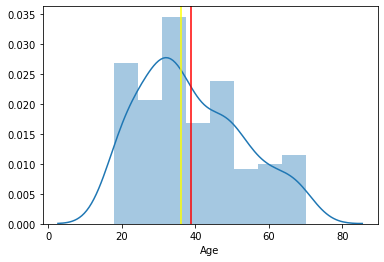

In [58]:
sns.distplot(df['Age'])
plt.axvline(df['Age'].mean(),color='red')
plt.axvline(df['Age'].median(),color='yellow')
plt.show()

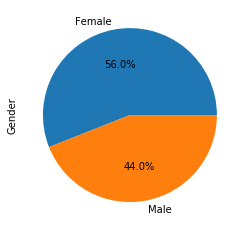

In [59]:
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

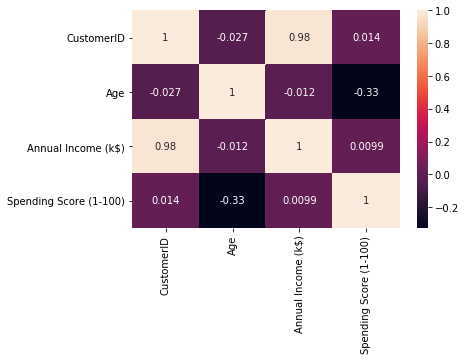

In [60]:
sns.heatmap(df.corr(),annot=True)
plt.show()

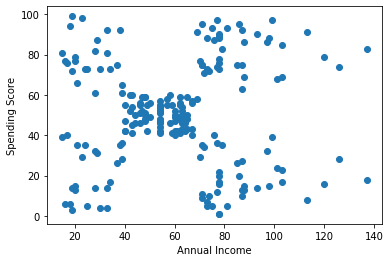

In [12]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [13]:
km=KMeans(n_clusters=3)

In [15]:
y_predicted=km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

In [16]:
df['cluster']=y_predicted
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
5,6,Female,22,17,76,1
6,7,Female,35,18,6,1
7,8,Female,23,18,94,1
8,9,Male,64,19,3,1
9,10,Female,30,19,72,1


In [17]:
km.cluster_centers_

array([[86.53846154, 82.12820513],
       [44.15447154, 49.82926829],
       [87.        , 18.63157895]])

In [19]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
123,124,Male,39,69,91,0
125,126,Female,31,70,77,0
127,128,Male,40,71,95,0
129,130,Male,38,71,75,0
131,132,Male,39,71,75,0
133,134,Female,31,72,71,0
135,136,Female,29,73,88,0
137,138,Male,32,73,73,0
139,140,Female,35,74,72,0
141,142,Male,32,75,93,0


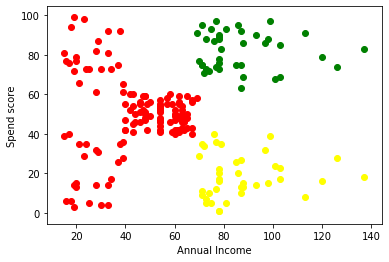

In [23]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='yellow')
plt.xlabel('Annual Income')
plt.ylabel('Spend score')
plt.show()

In [24]:
scaler=MinMaxScaler()
scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)']=scaler.transform(df[['Annual Income (k$)']])

In [26]:
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)']=scaler.transform(df[['Spending Score (1-100)']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,1
1,2,Male,21,0.000000,0.816327,1
2,3,Female,20,0.008197,0.051020,1
3,4,Female,23,0.008197,0.775510,1
4,5,Female,31,0.016393,0.397959,1


In [27]:
km=KMeans(n_clusters=3)

In [28]:
y_predicted=km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

In [29]:
df['cluster']=y_predicted
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,1
1,2,Male,21,0.000000,0.816327,1
2,3,Female,20,0.008197,0.051020,2
3,4,Female,23,0.008197,0.775510,1
4,5,Female,31,0.016393,0.397959,1
5,6,Female,22,0.016393,0.765306,1
6,7,Female,35,0.024590,0.051020,2
7,8,Female,23,0.024590,0.948980,1
8,9,Male,64,0.032787,0.020408,2
9,10,Female,30,0.032787,0.724490,1


In [30]:
km.cluster_centers_

array([[0.58638083, 0.82783883],
       [0.25631369, 0.5426549 ],
       [0.46737705, 0.1577551 ]])

In [31]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
123,124,Male,39,0.442623,0.918367,0
125,126,Female,31,0.450820,0.775510,0
127,128,Male,40,0.459016,0.959184,0
129,130,Male,38,0.459016,0.755102,0
131,132,Male,39,0.459016,0.755102,0
133,134,Female,31,0.467213,0.714286,0
135,136,Female,29,0.475410,0.887755,0
137,138,Male,32,0.475410,0.734694,0
139,140,Female,35,0.483607,0.724490,0
141,142,Male,32,0.491803,0.938776,0


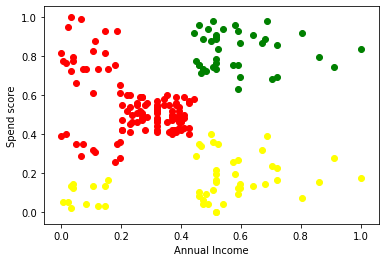

In [32]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='yellow')
plt.xlabel('Annual Income')
plt.ylabel('Spend score')
plt.show()

In [34]:
sse=[]
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

In [35]:
sse

[23.040720326039906,
 13.993505283127979,
 9.058985215159455,
 6.110312266413655,
 3.583117905952559,
 3.100022350860959,
 2.633231637828918,
 2.2202366688882824,
 1.9873627947617083]

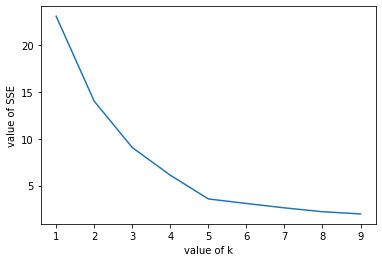

In [36]:
plt.xlabel('value of k')
plt.ylabel('value of SSE')
plt.plot(k_rng,sse)
plt.show()

In [37]:
km=KMeans(n_clusters=5)

In [38]:
y_predicted=km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

In [39]:
df['cluster']=y_predicted
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,0
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,0
4,5,Female,31,0.016393,0.397959,4
5,6,Female,22,0.016393,0.765306,0
6,7,Female,35,0.024590,0.051020,4
7,8,Female,23,0.024590,0.948980,0
8,9,Male,64,0.032787,0.020408,4
9,10,Female,30,0.032787,0.724490,0


In [40]:
km.cluster_centers_

array([[0.08792846, 0.79962894],
       [0.6       , 0.16443149],
       [0.33029751, 0.49508692],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432]])

In [41]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
1,2,Male,21,0.000000,0.816327,0
3,4,Female,23,0.008197,0.775510,0
5,6,Female,22,0.016393,0.765306,0
7,8,Female,23,0.024590,0.948980,0
9,10,Female,30,0.032787,0.724490,0
11,12,Female,35,0.032787,1.000000,0
13,14,Female,24,0.040984,0.775510,0
15,16,Male,22,0.040984,0.795918,0
17,18,Male,20,0.049180,0.663265,0
19,20,Female,35,0.065574,0.989796,0


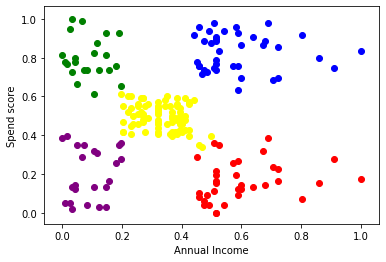

In [42]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='yellow')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='blue')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='purple')
plt.xlabel('Annual Income')
plt.ylabel('Spend score')
plt.show()

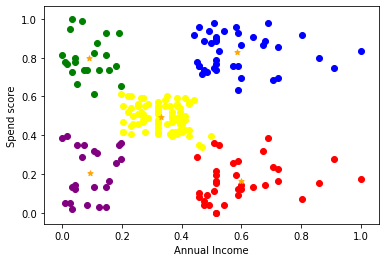

In [47]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='yellow')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='blue')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='purple')
plt.xlabel('Annual Income')
plt.ylabel('Spend score')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',
            label='centriod',s=30)
plt.show()


In [61]:
sse1=[]
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Spending Score (1-100)']])
    sse1.append(km.inertia_)

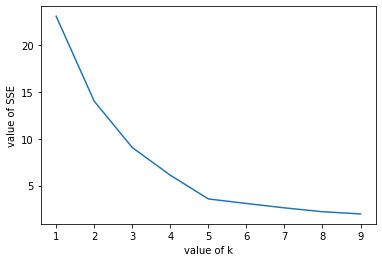

In [62]:
plt.xlabel('value of k')
plt.ylabel('value of SSE')
plt.plot(k_rng,sse)
plt.show()

In [63]:
km=KMeans(n_clusters=5)

In [64]:
y_predicted=km.fit_predict(df[['Age','Spending Score (1-100)']])

In [65]:
df['cluster']=y_predicted
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
5,6,Female,22,17,76,0
6,7,Female,35,18,6,2
7,8,Female,23,18,94,0
8,9,Male,64,19,3,3
9,10,Female,30,19,72,0


In [ ]:
km.cluster_centers_

In [66]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0
11,12,Female,35,19,99,0
13,14,Female,24,20,77,0
15,16,Male,22,20,79,0
19,20,Female,35,23,98,0
21,22,Male,25,24,73,0


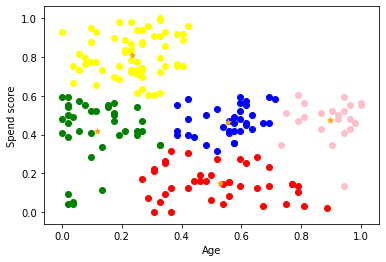

In [77]:
plt.scatter(df1['Age'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Age'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Age'],df3['Spending Score (1-100)'],color='yellow')
plt.scatter(df4['Age'],df4['Spending Score (1-100)'],color='blue')
plt.scatter(df5['Age'],df5['Spending Score (1-100)'],color='pink')
plt.xlabel('Age')
plt.ylabel('Spend score')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',
            label='centriod',s=30)
plt.show()


In [68]:
scaler=MinMaxScaler()
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

In [69]:
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)']=scaler.transform(df[['Spending Score (1-100)']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,15,0.387755,4
1,2,Male,0.057692,15,0.816327,0
2,3,Female,0.038462,16,0.051020,2
3,4,Female,0.096154,16,0.775510,0
4,5,Female,0.250000,17,0.397959,4


In [70]:
km=KMeans(n_clusters=5)

In [71]:
y_predicted=km.fit_predict(df[['Age','Spending Score (1-100)']])

In [72]:
df['cluster']=y_predicted
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,15,0.387755,0
1,2,Male,0.057692,15,0.816327,2
2,3,Female,0.038462,16,0.051020,0
3,4,Female,0.096154,16,0.775510,2
4,5,Female,0.250000,17,0.397959,0
5,6,Female,0.076923,17,0.765306,2
6,7,Female,0.326923,18,0.051020,1
7,8,Female,0.096154,18,0.948980,2
8,9,Male,0.884615,19,0.020408,1
9,10,Female,0.230769,19,0.724490,2


In [73]:
km.cluster_centers_

array([[0.11791498, 0.41675618],
       [0.52767355, 0.1483325 ],
       [0.23347356, 0.80771684],
       [0.55549451, 0.46705539],
       [0.8951049 , 0.47495362]])

In [74]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

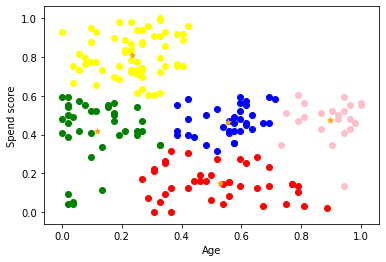

In [76]:
plt.scatter(df1['Age'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Age'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Age'],df3['Spending Score (1-100)'],color='yellow')
plt.scatter(df4['Age'],df4['Spending Score (1-100)'],color='blue')
plt.scatter(df5['Age'],df5['Spending Score (1-100)'],color='pink')
plt.xlabel('Age')
plt.ylabel('Spend score')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',
            label='centriod',s=30)
plt.show()